# 逻辑回归

# **逻辑回归**

1. [组件：Sigmoid函数](#t1.)
2. [示例：逻辑回归模型框架](#t2.)
3. [案例一：股票客户流失预警模型](#t3.)
4. [案例二：泰坦尼克号乘客生存预测](#t4.)
    

<a id="t1."></a>
### 1. 组件：Sigmoid函数

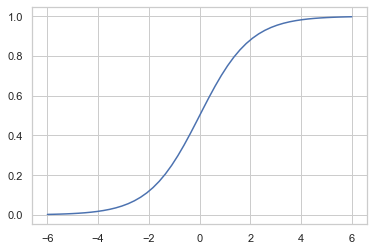

In [60]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-6, 6)  # 生成-6到6的等差数列，默认50个数
y = 1.0 / (1.0 + np.exp(-x))  # Sigmoid函数计算公式

plt.plot(x,y)  # 画图
plt.show()  # 展示

<a id="t2."></a>
### 2. 示例

In [2]:
# 构造数据
X = [[1, 0], [5, 1], [6, 4], [4, 2], [3, 2]]
y = [0, 1, 1, 0, 0]

# 模型训练，多分类一样
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

# 模型预测 - 预测单个数据
print(model.predict([[2,2]]))


[0]


In [3]:
# 预测的概率
import pandas as pd
y_pred_proba = model.predict_proba(X)
pred_proba = pd.DataFrame(y_pred_proba, columns=['分类为0的概率', '分类为1的概率'])
pred_proba

,分类为0的概率,分类为1的概率
0,0.973449,0.026551
1,0.390720,0.609280
2,0.179910,0.820090
3,0.631679,0.368321
4,0.824245,0.175755


In [4]:
# 打印系数和截距项
print(model.coef_)  # 系数k1与k2
print(model.intercept_)  # 截距项k0

[[1.00595248 0.02223835]]
[-4.60771284]


<a id="t3."></a>
### 3. 案例一：股票客户流失预警模型

In [5]:
# 1.读取数据
import pandas as pd
df = pd.read_excel('股票客户流失.xlsx')
df

,账户资金（元）,最后一次交易距今时间（天）,上月交易佣金（元）,累计交易佣金（元）,本券商使用时长（年）,是否流失
0,22686.5,297,149.25,2029.85,0,0
1,190055.0,42,284.75,3889.50,2,0
2,29733.5,233,269.25,2108.15,0,1
3,185667.5,44,211.50,3840.75,3,0
4,33648.5,213,353.50,2151.65,0,1
...,...,...,...,...,...,...
7038,199145.0,40,424.00,3990.50,1,0
7039,682661.0,1,516.00,9362.90,5,0
7040,51180.5,167,148.00,2346.45,0,0
7041,47594.0,174,372.00,2306.60,0,1


In [6]:
# 2.划分特征变量和目标变量
X = df.drop(columns='是否流失') 
y = df['是否流失']

In [7]:
# 3.划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 训练集与测试集的比例为8：2

In [8]:
# 4.模型搭建
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
# 5.预测结果
y_pred = model.predict(X_test)

[0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1]


In [10]:
# 6.查看全部的预测准确度
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)  # 打印整体的预测准确度

0.7977288857345636


In [11]:
# 7.预测概率
y_pred_proba = model.predict_proba(X_test)
print(y_pred_proba[0:5])  # 打印前5个客户的分类概率

[[0.82041491 0.17958509]
 [0.84029613 0.15970387]
 [0.79819342 0.20180658]
 [0.62989192 0.37010808]
 [0.61636611 0.38363389]]


<a id="t3.1."></a>
### 3.1 优化
方案一：标准化与归一化  
方案二：PCA降维  
方案三：标准化/归一化与PCA降维  
结果：均未能提升效果

In [45]:
data = pd.read_excel('股票客户流失.xlsx')

X = data.drop(columns='是否流失')
y = data['是否流失']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [59]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
MM = MinMaxScaler()
X_train_mm = MM.fit_transform(X_train)
X_test_std = MM.transform(X_test)

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X_train_mm)

PCA(n_components=1)

In [65]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

In [67]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score) 

0.7530163236337828


<a id="t4."></a>
### 4. 案例二：泰坦尼克号乘客生存预测

#### 4.1 导入数据

In [1]:
# 导包
import numpy as np
import pandas as pd

from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #设置seaborn画图的背景为白色
sns.set(style="whitegrid", color_codes=True)

d:\1_Software\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\__init__.py:1: MatplotlibDeprecationWarning: 
The deprecated function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  from .axes3d import Axes3D


In [36]:
# 读入数据
df = pd.read_csv("./titanic_data.csv")

# 预览数据
print(df.head())

# 特征说明，pclass(客舱等级)，sibsp(一同登船的兄弟姐妹或者配偶数量)，parch(一同登船的父母或子女数量)，cabin(仓位)，embarked(登船地点)

print('数据集包含的数据个数 {}.'.format(df.shape[0]))

   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked  
0  29.0000    0.0    0.0   24160  211.3375       B5        S  
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S  
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  
数据集包含的数据个数 1310.


#### 4.2 查看缺失数据

In [37]:
# 查看数据集中各个特征缺失的情况
df.isnull().sum()

pclass         1
survived       1
name           1
sex            1
age          264
sibsp          1
parch          1
ticket         1
fare           2
cabin       1015
embarked       3
dtype: int64

4.2.1 年龄

In [38]:
# "age" 缺失的百分比 
print('"age" 缺失的百分比  %.2f%%' %((df['age'].isnull().sum()/df.shape[0])*100))

"age" 缺失的百分比  20.15%


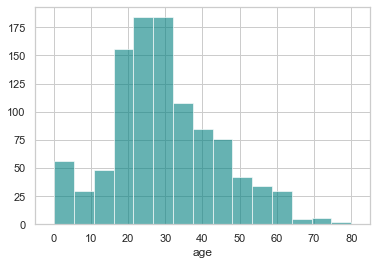

In [39]:
# 查看年龄分布情况
ax = df["age"].hist(bins=15, color='teal', alpha=0.6)
ax.set(xlabel='age')
plt.xlim(-5,85)
plt.show()

由于“年龄”的偏度不为0, 使用均值替代缺失值不是最佳选择, 这里可以选择使用中间值替代缺失值


<font color=red> 注: 在概率论和统计学中，偏度衡量实数随机变量概率分布的不对称性。偏度的值可以为正，可以为负或者甚至是无法定义。在数量上，偏度为负（负偏态）就意味着在概率密度函数左侧的尾部比右侧的长，绝大多数的值（不一定包括中位数在内）位于平均值的右侧。偏度为正（正偏态）就意味着在概率密度函数右侧的尾部比左侧的长，绝大多数的值（不一定包括中位数）位于平均值的左侧。偏度为零就表示数值相对均匀地分布在平均值的两侧，但不一定意味着其为对称分布。</font>

In [40]:
# 年龄的均值
print('The mean of "Age" is %.2f' %(df["age"].mean(skipna=True)))
# 年龄的中间值
print('The median of "Age" is %.2f' %(df["age"].median(skipna=True)))

The mean of "Age" is 29.88
The median of "Age" is 28.00


4.2.2 仓位

In [41]:
# 仓位缺失的百分比
print('"Cabin" 缺失的百分比 %.2f%%' %((df['cabin'].isnull().sum()/df.shape[0])*100))

"Cabin" 缺失的百分比 77.48%


4.2.3 登船地点

In [42]:
# 登船地点的缺失率
print('"Embarked" 缺失的百分比 %.2f%%' %((df['embarked'].isnull().sum()/df.shape[0])*100))

"Embarked" 缺失的百分比 0.23%


按照登船地点分组 (C = Cherbourg, Q = Queenstown, S = Southampton):
S    914
C    270
Q    123
Name: embarked, dtype: int64


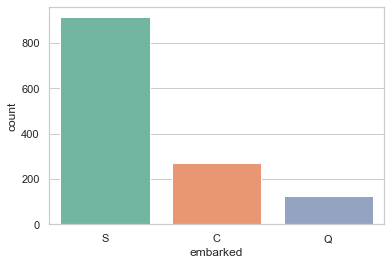

In [43]:
print('按照登船地点分组 (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(df['embarked'].value_counts())
sns.countplot(x='embarked', data=df, palette='Set2')
plt.show()

In [61]:
print('乘客登船地点的众数为 %s.' %df['embarked'].value_counts().idxmax())

乘客登船地点的众数为 S.


### 4.3 数据预处理

基于以上分析, 我们进行如下调整:
* 如果一条数据的 "Age" 缺失, 使用年龄的中位数 28 替代.
* 如果一条数据的 "Embarked" 缺失, 使用登船地点的众数 “S” 替代.
* 由于太多乘客的 “Cabin” 数据缺失, 从所有数据中丢弃这个特征的值.

In [45]:
data = df.copy()
data["age"].fillna(df["age"].median(skipna=True), inplace=True)
data["embarked"].fillna(df['embarked'].value_counts().idxmax(), inplace=True)
data.drop('cabin', axis=1, inplace=True)

In [46]:
# 确认是否还包含缺失数据
data.isnull().sum()

pclass      1
survived    1
name        1
sex         1
age         0
sibsp       1
parch       1
ticket      1
fare        2
embarked    0
dtype: int64

In [47]:
# 测试缺失值是否集中在一行
data[data['pclass'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
1309,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,S


In [48]:
# 剔除index为1309的行
data.drop(index=1309,inplace=True)

In [49]:
data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        1
embarked    0
dtype: int64

In [50]:
# 查看fare为空值所在行
data[data['fare'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
1225,3.0,0.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,S


In [51]:
data["fare"].fillna(df['fare'].value_counts().idxmax(), inplace=True)

In [52]:
data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [53]:
# 预览调整过的数据
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


数据中的两个特征 “sibsp” (一同登船的兄弟姐妹或者配偶数量)与“parch”(一同登船的父母或子女数量)都是代表是否有同伴同行。为了预防这两个特征具有多重共线性，我们可以将这两个变量转为一个变量 “TravelAlone” (是否独自一人成行)


<font color='red'>注: 多重共线性(multicollinearity)是指多变量线性回归中，变量之间由于存在高度相关关系而使回归估计不准确。比如虚拟变量陷阱（Dummy variable trap）即有可能触发多重共线性问题。</font>

In [54]:
# 创建一个新的变量'TravelAlone'记录是否独自成行, 丢弃“sibsp” (一同登船的兄弟姐妹或者配偶数量)与“parch”(一同登船的父母或子女数量)
data['TravelAlone']=np.where((data["sibsp"]+data["parch"])>0, 0, 1)
data.drop('sibsp', axis=1, inplace=True)
data.drop('parch', axis=1, inplace=True)

对类别变量(categorical variables)使用独热编码(One-Hot Encoding), 将字符串类别转换为数值

In [55]:
# 对 Embarked","Sex"进行独热编码, 丢弃 'name', 'ticket'
final = pd.get_dummies(data, columns=["embarked","sex"])
final.drop('name', axis=1, inplace=True)
final.drop('ticket', axis=1, inplace=True)

final.head()

,pclass,survived,age,fare,TravelAlone,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1.0,1.0,29.0000,211.3375,1,0,0,1,1,0
1,1.0,1.0,0.9167,151.5500,0,0,0,1,0,1
2,1.0,0.0,2.0000,151.5500,0,0,0,1,1,0
3,1.0,0.0,30.0000,151.5500,0,0,0,1,0,1
4,1.0,0.0,25.0000,151.5500,0,0,0,1,1,0


### 4.4 数据分析

4.4.1 年龄

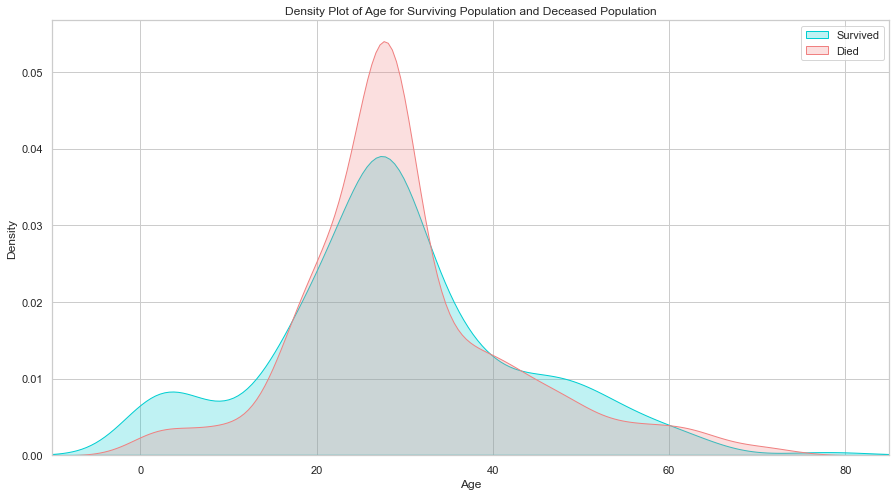

In [56]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final["age"][final.survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final["age"][final.survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

生还与遇难群体的分布相似，较大的区别是生还群体中有一部分低年龄的乘客（图左侧），说明当时的人预先保留了孩子的生还机会。

4.4.2 票价

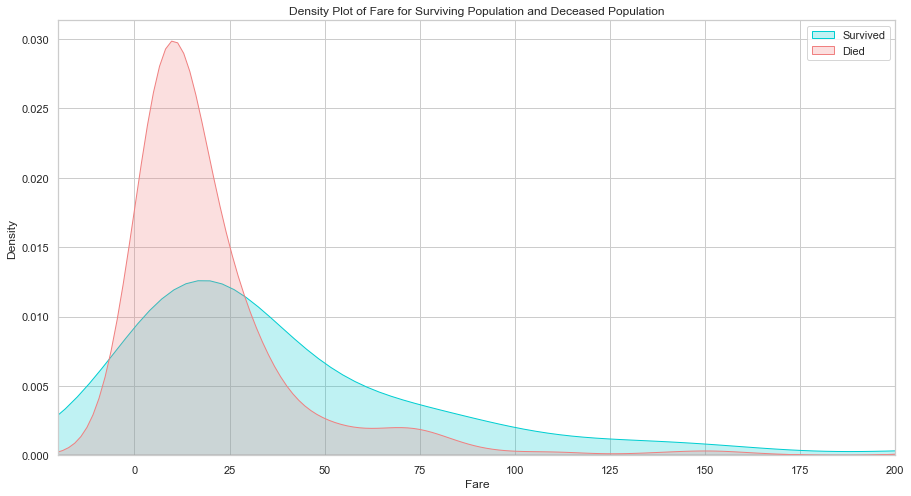

In [57]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final["fare"][final.survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final["fare"][final.survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

生还与遇难群体的票价分布差异比较大，说明这个特征对预测乘客是否生还非常重要。票价和仓位相关，也许是仓位影响了逃生的效果，我们接下来看仓位的分析。

4.2.3 其他

d:\1_Software\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\1_Software\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\1_Software\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\1_Software\anaconda3\l

<AxesSubplot:xlabel='sex', ylabel='survived'>

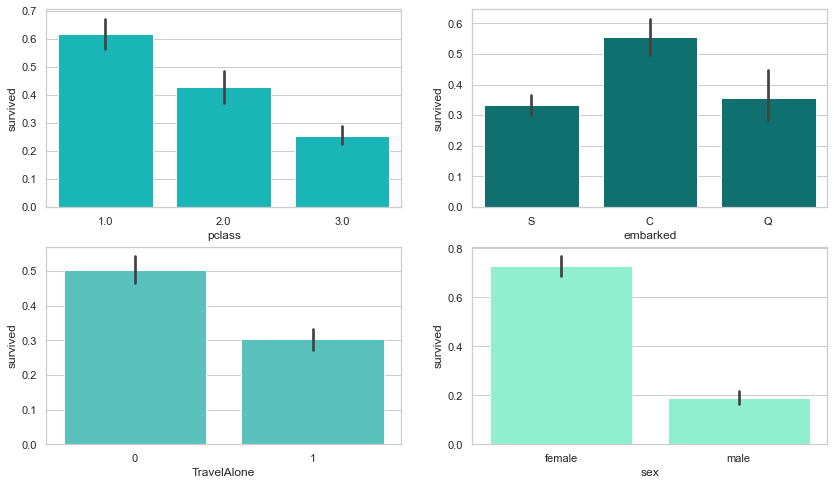

In [58]:
# 绘制画布并设置大小
plt.figure(figsize=(14,8))
# 仓位
plt.subplot(2,2,1)
sns.barplot('pclass', 'survived', data=df, color="darkturquoise")
# 登船地点
plt.subplot(2,2,2)
sns.barplot('embarked', 'survived', data=df, color="teal")
# 是否独自成行
plt.subplot(2,2,3)
sns.barplot('TravelAlone', 'survived', data=final, color="mediumturquoise")
# 性别
plt.subplot(2,2,4)
sns.barplot('sex', 'survived', data=df, color="aquamarine")

如我们所料，一等舱的乘客生还几率最高。  
同时，从法国 Cherbourge 登录的乘客生还率最高；  
独自成行的乘客生还率比较低；  
当时的年代，大多数独自成行的乘客为男性居多；很明显，女性的生还率比较高。

### 4.5 建模

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 使用如下特征做预测
cols = ["age","fare","TravelAlone","pclass","embarked_C","embarked_Q","sex_male"] 

# 创建 X (特征) 和 y (类别标签)
X = final[cols]
y = final['survived']

# 将 X 和 y 分为两个部分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 创建并拟合逻辑回归模型
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# 打印准确率
print("准确率为 %2.3f" % accuracy_score(y_test, y_pred))

准确率为 0.802


d:\1_Software\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
